In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [4]:
df=pd.read_csv(r"crop_recommendation.csv")

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
print(np.unique(df['label']))

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [11]:
df['label'].value_counts()

lentil         100
cotton         100
banana         100
mungbean       100
mango          100
pigeonpeas     100
maize          100
kidneybeans    100
rice           100
coffee         100
pomegranate    100
chickpea       100
apple          100
grapes         100
orange         100
papaya         100
mothbeans      100
jute           100
watermelon     100
blackgram      100
coconut        100
muskmelon      100
Name: label, dtype: int64

<AxesSubplot:>

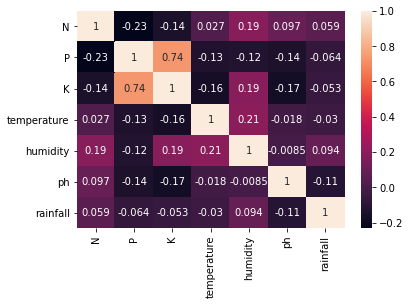

In [12]:
#To check the correlation among various parametrs 
sns.heatmap(df.corr(),annot=True)

In [13]:
# features are x that is Independent variable
# target is y that is dependent variable 
features = df[['N','P','K','temperature','humidity','rainfall']]
target=df['label']

In [14]:
# Spliting data into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=2)

In [21]:
#ceating a list to compare the model based on their accuracy at the end
accuracy_models=[]
name_models=[]

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
DT=DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [17]:
predicted_values=DT.predict(X_test)

In [19]:
x=metrics.accuracy_score(Y_test,predicted_values)
print(x)

0.9045454545454545


In [22]:
accuracy_models.append(x)
name_models.append('Decision Tree')

In [23]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.76      1.00      0.86        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Guassian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [26]:
predicted_values=NB.predict(X_test)

In [28]:
x = metrics.accuracy_score(Y_test, predicted_values)
print(x)

0.9863636363636363


In [29]:
accuracy_models.append(x)
name_models.append('Naive Bayes')

In [30]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

## Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [38]:
normalization=MinMaxScaler().fit(X_train)
X_train_normalized=normalization.transform(X_train)
X_test_normalized=normalization.transform(X_test)

In [39]:
# Normalized data in 1 to 0 format
print(X_train_normalized)
print(X_test_normalized)

[[0.80714286 0.23571429 0.1        0.37805582 0.76071051 0.25238444]
 [0.2        0.21428571 0.085      0.59411218 0.84542489 0.14256792]
 [0.07857143 0.4        0.08       0.28113814 0.10209972 0.41384053]
 ...
 [0.16428571 0.24285714 0.085      0.58625323 0.7899586  0.07841231]
 [0.83571429 0.54285714 0.24       0.59344273 0.74592957 0.28007559]
 [0.27857143 0.13571429 0.045      0.62350543 0.89407786 0.30863709]]
[[0.59285714 0.11428571 0.115      0.48039873 0.5392594  0.61114405]
 [0.00714286 0.15714286 0.155      0.43501842 0.92253391 0.30475516]
 [0.16428571 0.         0.195      0.35528389 0.9332759  0.31401068]
 ...
 [0.04285714 0.42142857 0.09       0.41635733 0.61990663 0.05742653]
 [0.26428571 0.36428571 0.1        0.37963607 0.06219345 0.38288597]
 [0.63571429 0.34285714 0.195      0.46087051 0.67255606 0.4674443 ]]


In [41]:
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_normalized,Y_train)

SVC(C=1, kernel='poly')

In [42]:
predicted_values = SVM.predict(X_test_normalized)

In [44]:
x = metrics.accuracy_score(Y_test, predicted_values)
print(x)

0.9772727272727273


In [45]:
accuracy_models.append(x)
name_models.append('SVM')

In [46]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
LR = LogisticRegression(random_state=2)
LR.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [51]:
predicted_values = LR.predict(X_test)

In [53]:
x = metrics.accuracy_score(Y_test, predicted_values)
print(x)

0.9522727272727273


In [54]:
accuracy_models.append(x)
name_models.append('Logistic Regression')

In [55]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.92      0.69      0.79        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      0.96      0.92        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.77      0.89      0.83        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [58]:
predicted_values = RF.predict(X_test)

In [59]:
x = metrics.accuracy_score(Y_test, predicted_values)
print(x)

0.9863636363636363


In [60]:
accuracy_models.append(x)
name_models.append('Random Forest')

In [61]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

## Accuracy Comparison

In [62]:
print(accuracy_models)

[0.9045454545454545, 0.9863636363636363, 0.9772727272727273, 0.9522727272727273, 0.9863636363636363]


In [63]:
print(name_models)

['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest']


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

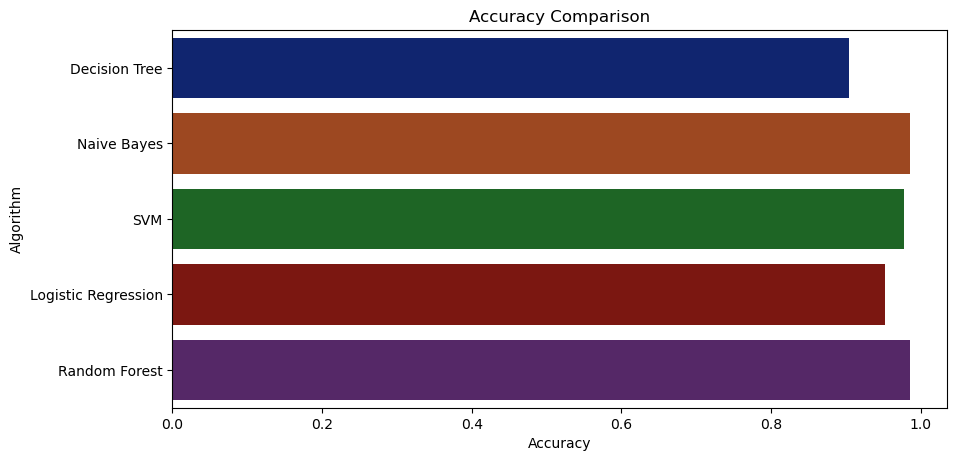

In [64]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy_models,y = name_models,palette='dark')

In [69]:
print("Analysis on accuracy of various models")
count=0
for i in name_models:    
    print(str(count+1)+") "+i+" --> "+str(accuracy_models[count]))
    count=count+1

Analysis on accuracy of various models
1) Decision Tree --> 0.9045454545454545
2) Naive Bayes --> 0.9863636363636363
3) SVM --> 0.9772727272727273
4) Logistic Regression --> 0.9522727272727273
5) Random Forest --> 0.9863636363636363


In [ ]:
""""
As the accuracy of the Random Forest is more we will be using Random Forest Model for crop prediction.
""""

## Dumping the model

In [70]:
#Saving a Random Forest MOdel
import pickle

RF_pkl_filename = 'MiniProject_RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()